### Project Venta de Videojuegos
https://www.kaggle.com/datasets/gregorut/videogamesales/data

In [46]:
### Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
### Agregamos Datasets
df = pd.read_csv('Datasets/vgsales.csv')

In [48]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [49]:
df.shape

(16598, 11)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [52]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.000,Sports,Nintendo,41.490,29.020,3.770,8.460,82.740
1,2,Super Mario Bros.,NES,1985.000,Platform,Nintendo,29.080,3.580,6.810,0.770,40.240
2,3,Mario Kart Wii,Wii,2008.000,Racing,Nintendo,15.850,12.880,3.790,3.310,35.820
3,4,Wii Sports Resort,Wii,2009.000,Sports,Nintendo,15.750,11.010,3.280,2.960,33.000
4,5,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,Nintendo,11.270,8.890,10.220,1.000,31.370


In [ ]:
# Identificacion de datos ausentes
df.isnull().sum()

In [ ]:
### Eliminar filas con valores nulos
df = df.dropna()

In [ ]:
# Identificacion de datos ausentes
df.isnull().sum()

In [ ]:
df.shape

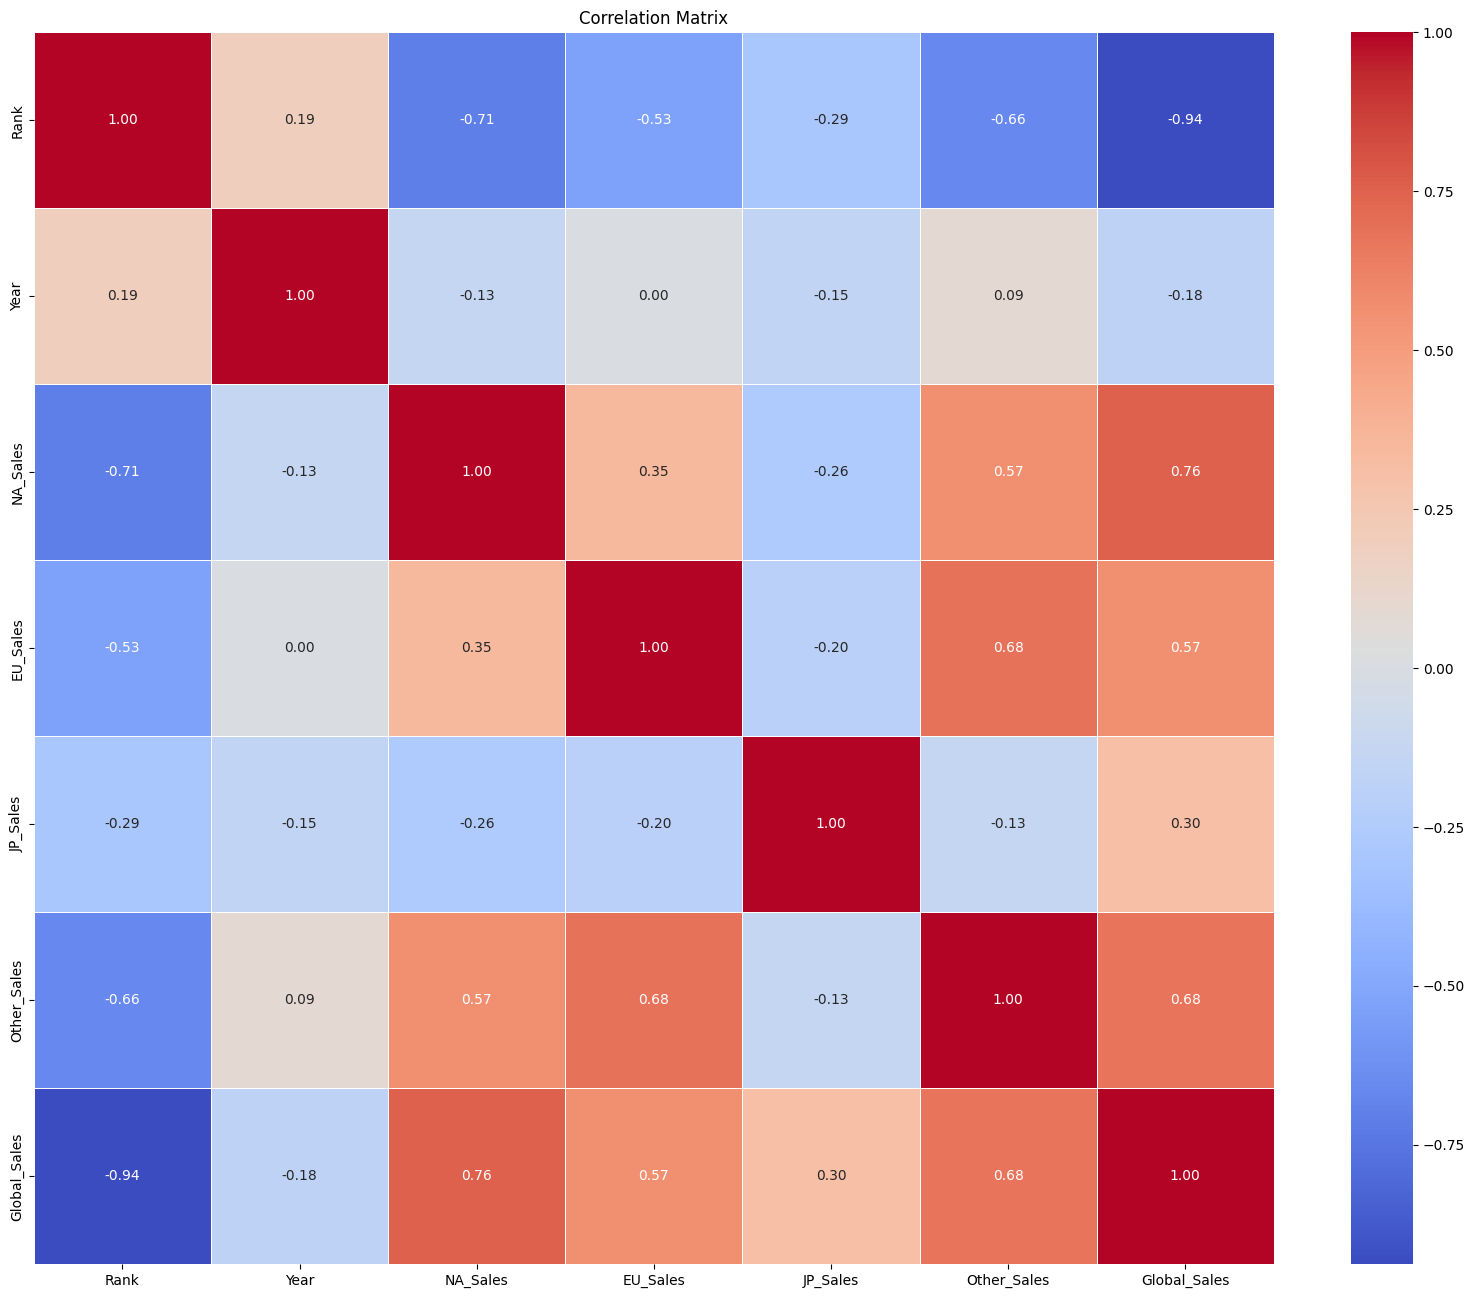

In [37]:
#Exclusión de columnas no relevantes
df_numeric = df.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()

# Configura el estilo de la figura
plt.figure(figsize=(20, 16))

# Crea un mapa de calor con seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añade título
plt.title('Correlation Matrix')

# Muestra la visualización
plt.show()

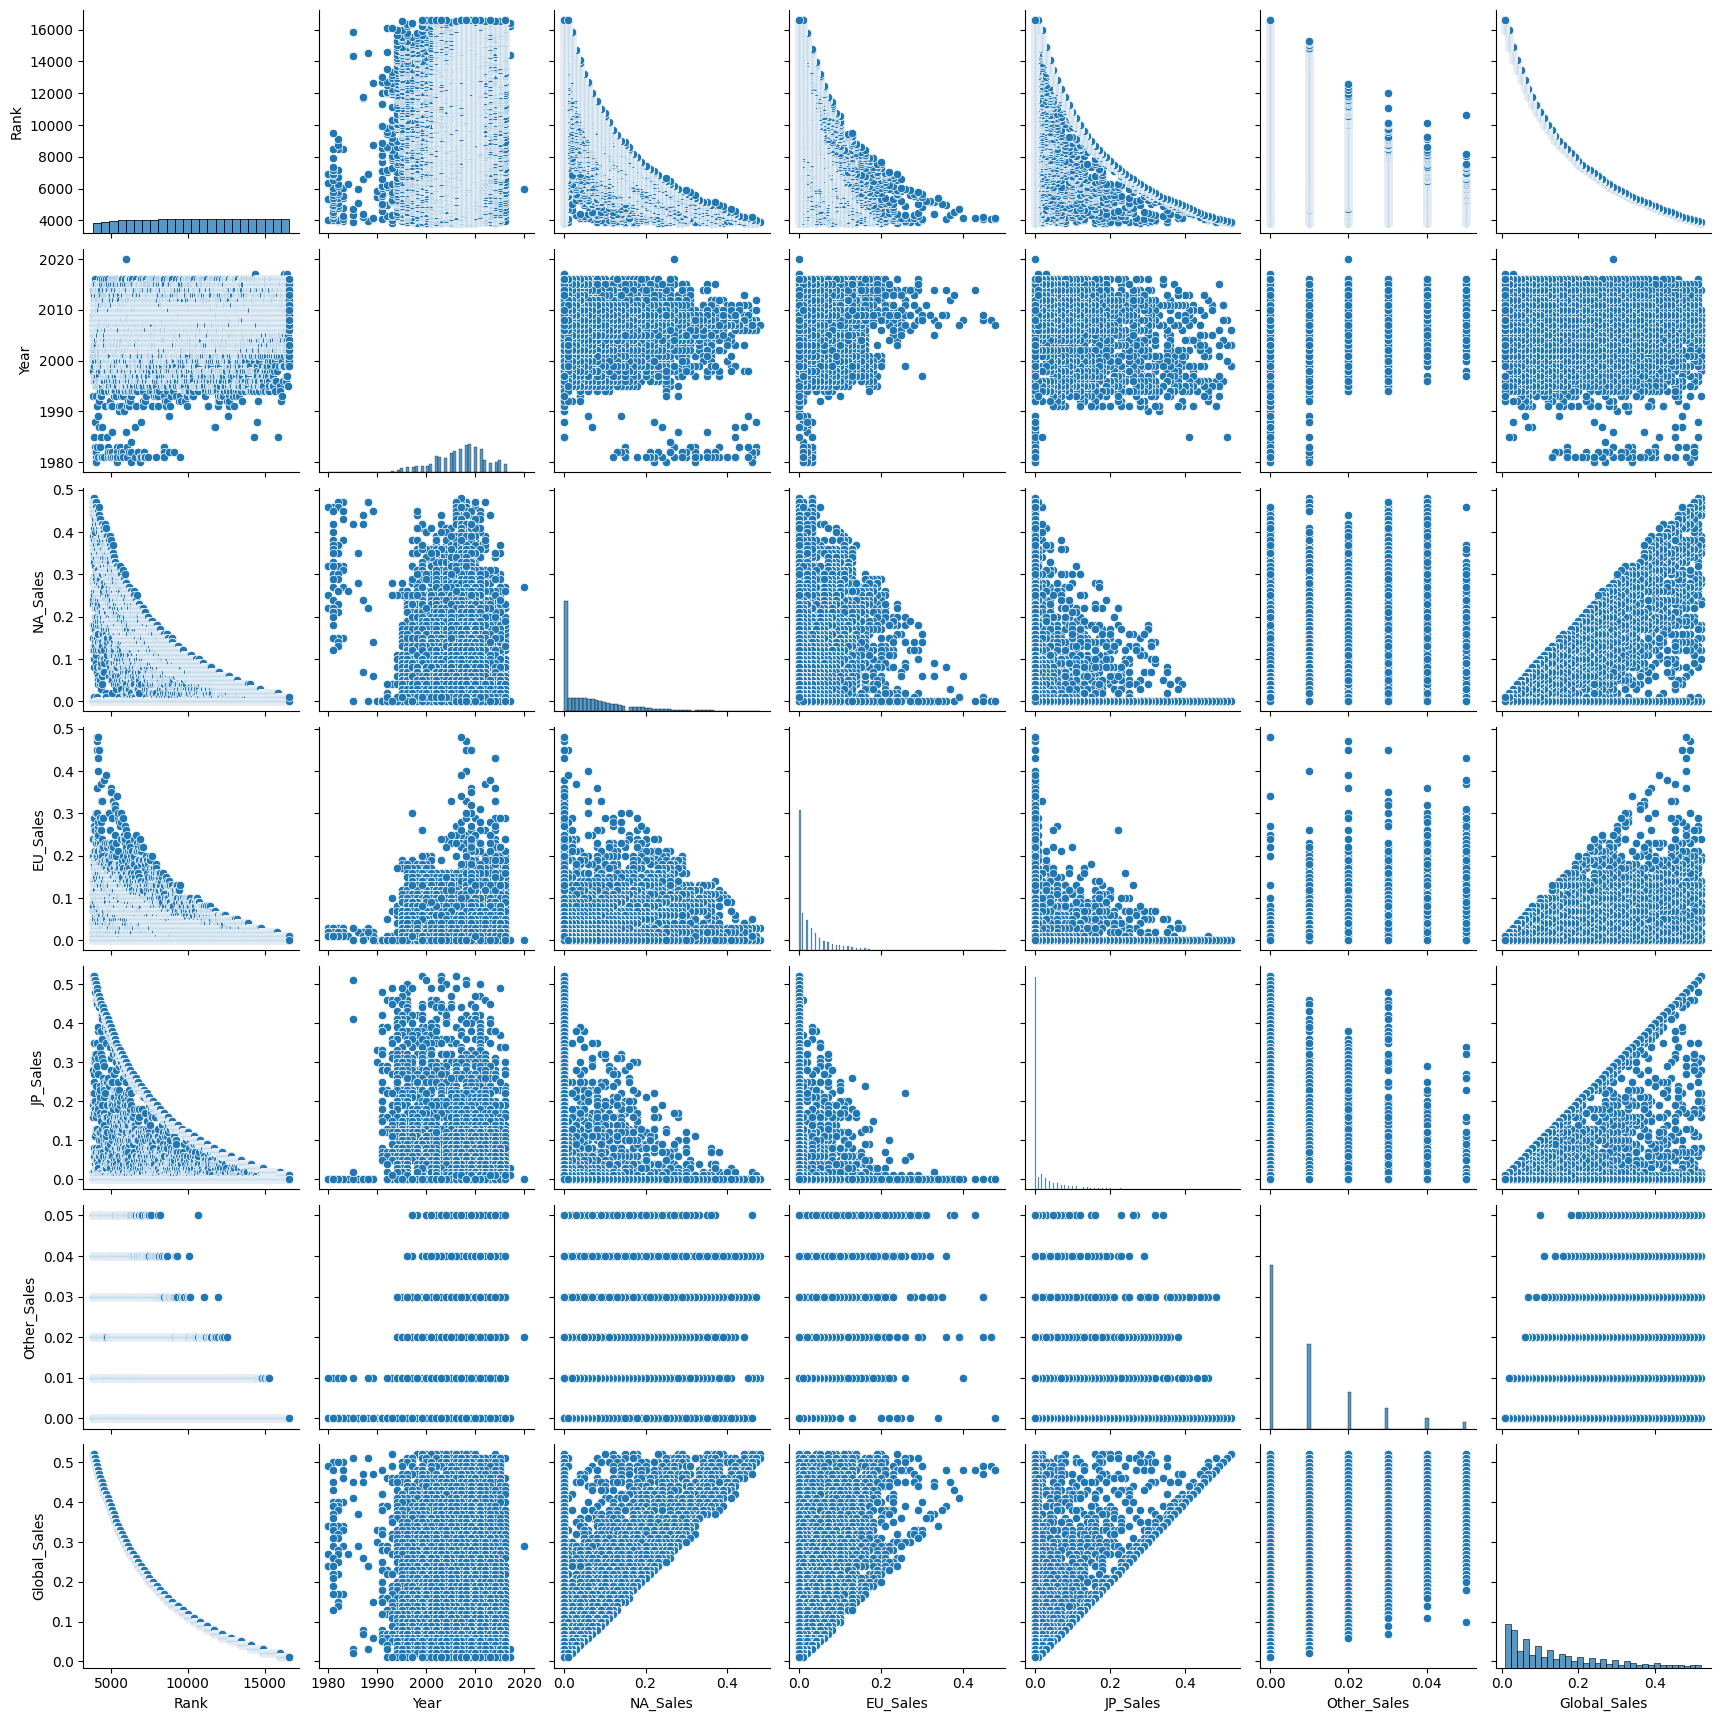

In [38]:
sns.pairplot(df_numeric)

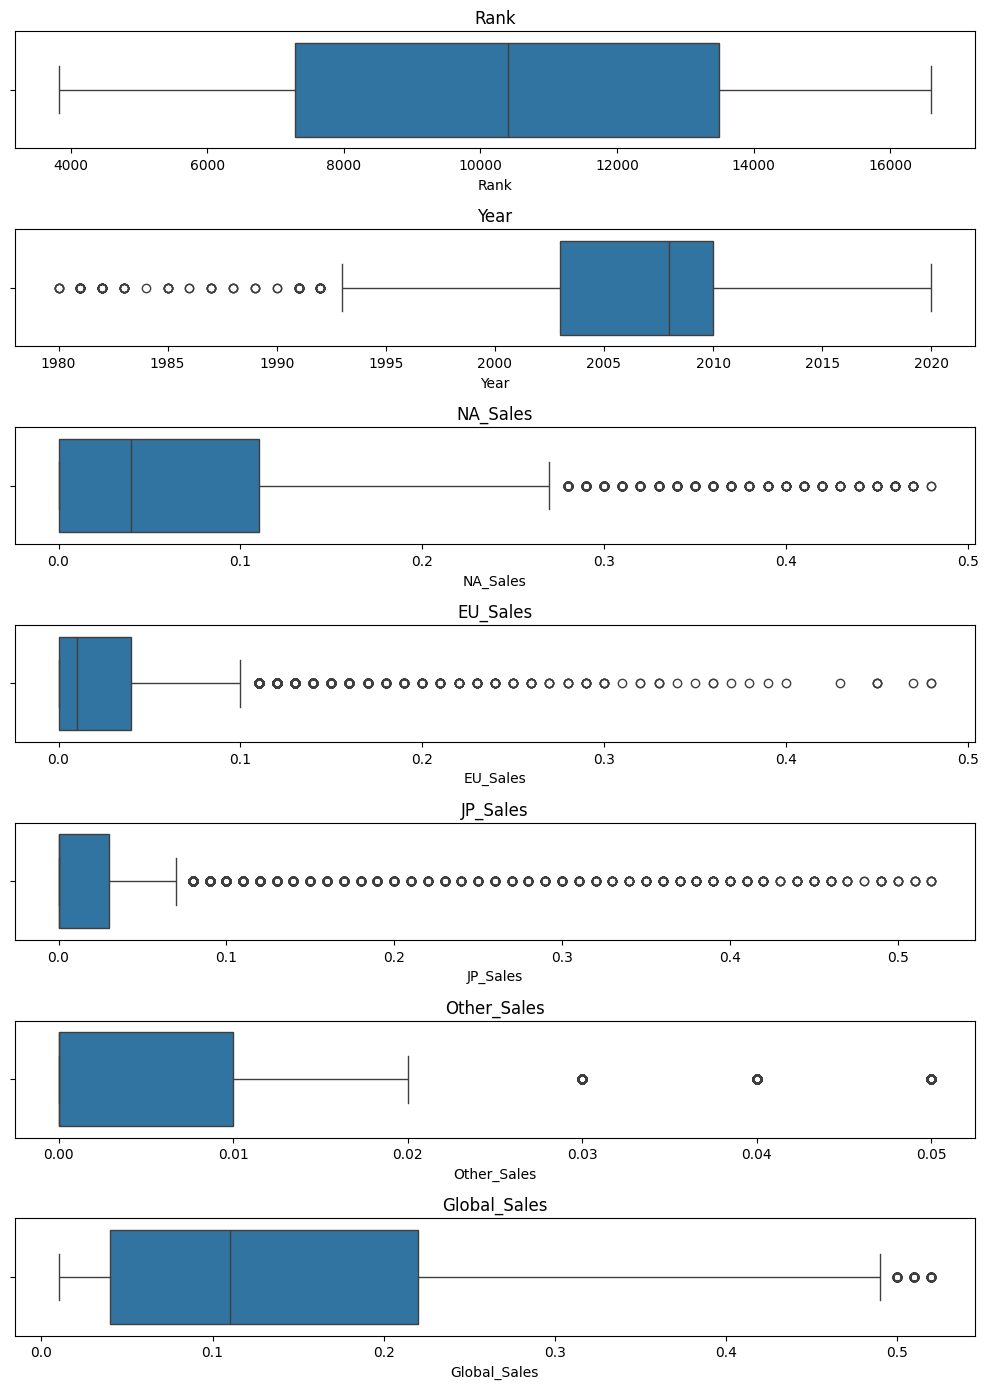

In [39]:
# Supongamos que df es tu DataFrame
num_cols = df_numeric.select_dtypes(include=['Float64', 'int64']).columns

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generar boxplots individuales
for i, col in enumerate(num_cols):
    sns.boxplot(x=df_numeric[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [29]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [40]:
# Lista de columnas con outliers
columns_with_outliers = ['Na_Sales', 'Eu_Sales', 'Jp_Sales', 'Other_Sales', 'Global_Sales']
valid_columns = [col for col in columns_with_outliers if col in df.columns]

# Definir una función para eliminar los outliers basados en el IQR
def remove_outliers(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        return df

# Eliminar outliers solo en las columnas válidas
for col in valid_columns:
    df = remove_outliers(df, col)

# Agora df no tiene outliers en las columnas especificadas


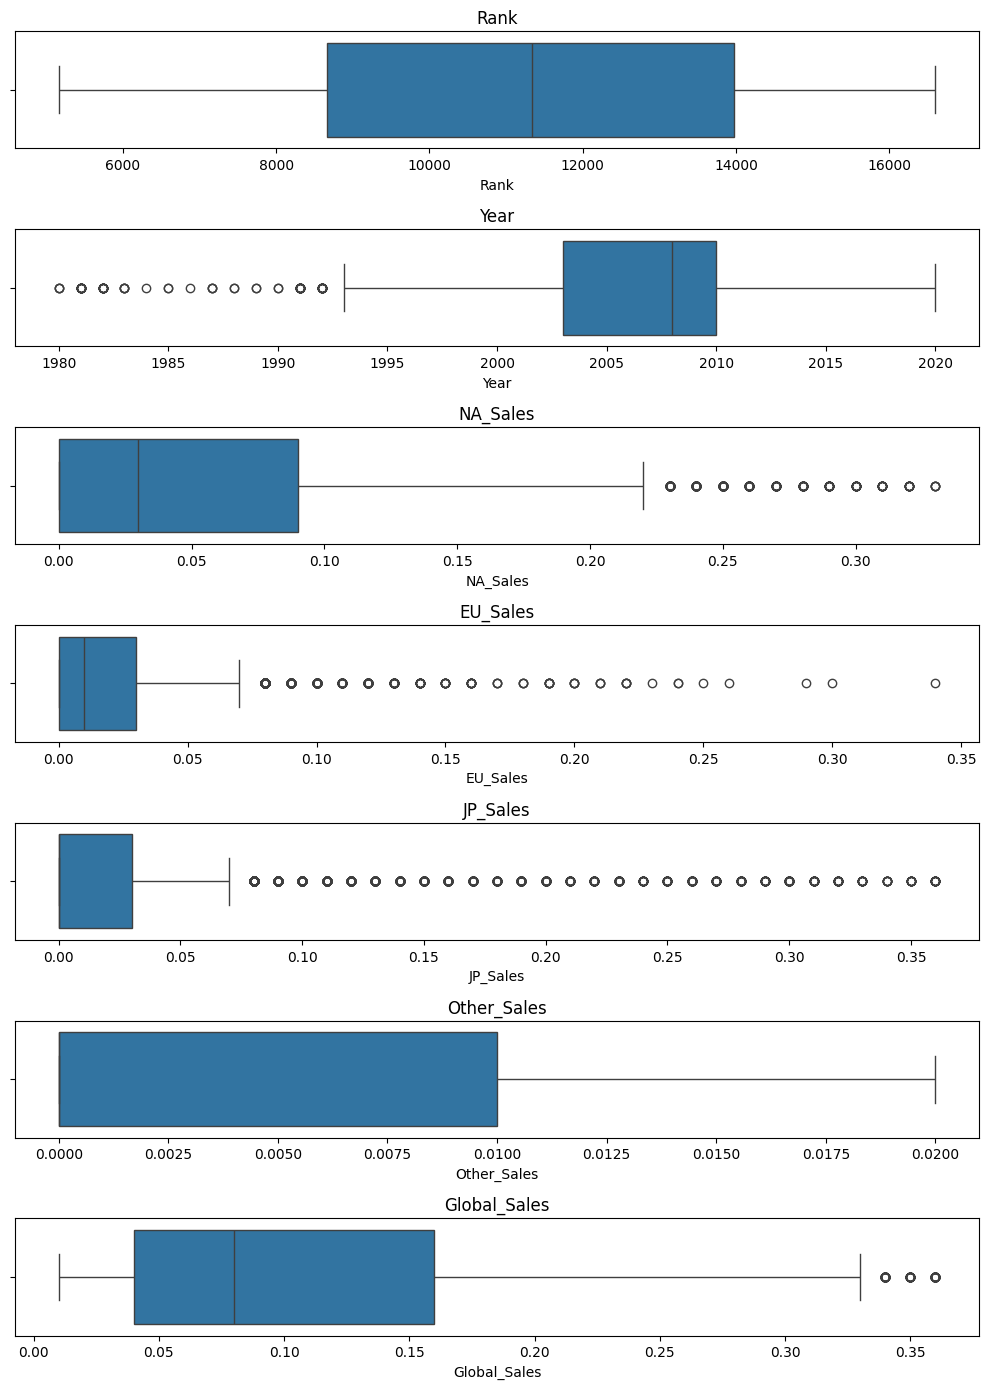

In [41]:
df_numeric = df.select_dtypes(include='number')

# Supongamos que df es tu DataFrame
num_cols = df_numeric.select_dtypes(include=['Float64', 'int64']).columns

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generar boxplots individuales
for i, col in enumerate(num_cols):
    sns.boxplot(x=df_numeric[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [34]:
df.shape

(12402, 11)

In [35]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,12402.000000,12187.000000,12402.000000,12402.000000,12402.000000,12402.000000,12402.000000
mean,10374.660297,2006.703619,0.074141,0.029979,0.032339,0.009140,0.145964
std,3616.598082,5.494350,0.091997,0.046443,0.073771,0.012223,0.126341
min,3824.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,7290.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.040000
50%,10397.500000,2008.000000,0.040000,0.010000,0.000000,0.000000,0.110000
75%,13498.750000,2010.000000,0.110000,0.040000,0.030000,0.010000,0.220000
max,16600.000000,2020.000000,0.480000,0.480000,0.520000,0.050000,0.520000


In [36]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,12402.000,12187.000,12402.000,12402.000,12402.000,12402.000,12402.000
mean,10374.660,2006.704,0.074,0.030,0.032,0.009,0.146
std,3616.598,5.494,0.092,0.046,0.074,0.012,0.126
min,3824.000,1980.000,0.000,0.000,0.000,0.000,0.010
25%,7290.250,2003.000,0.000,0.000,0.000,0.000,0.040
50%,10397.500,2008.000,0.040,0.010,0.000,0.000,0.110
75%,13498.750,2010.000,0.110,0.040,0.030,0.010,0.220
max,16600.000,2020.000,0.480,0.480,0.520,0.050,0.520
